## Repurposing Masks to boxes

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import torch

In [5]:
import torchvision.transforms.functional as F

In [6]:
plt.rcParams["savefig.bbox"] = "tight"

In [7]:
def show(imgs):
    if not isinstance(imgs,list):
        imgs = [imgs]
    fix,axs = plt.subplots(ncols=len(imgs),squeeze=False,figsize=(15, 5))
    for i ,img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0,i].imshow(np.asarray(img))
        axs[0,i].set(xticklabels = [],yticklabels = [],xticks = [],yticks = [])

### Converting Masks to Bounding Boxes

In [8]:
from torchvision.io import read_image

In [9]:
data_path = 'E:/jupyterlab/PyTorch Tutorial/TorchVision Object Detection Finetuning Tutorial/PennFudanPed\PennFudanPed'

In [10]:
img_path = os.path.join(data_path,'PNGImages','FudanPed00001.png')
mask_path = os.path.join(data_path,'PedMasks','FudanPed00001_mask.png')

In [11]:
img = read_image(img_path)
mask = read_image(mask_path)

In [12]:
img

tensor([[[211, 210, 212,  ..., 143, 146, 148],
         [179, 173, 170,  ..., 126, 128, 128],
         [204, 194, 188,  ..., 130, 131, 130],
         ...,
         [226, 217, 211,  ..., 183, 184, 185],
         [231, 219, 210,  ..., 187, 187, 186],
         [225, 227, 215,  ..., 190, 190, 187]],

        [[200, 199, 201,  ...,  96,  99, 101],
         [168, 162, 159,  ...,  79,  81,  81],
         [193, 183, 177,  ...,  83,  84,  83],
         ...,
         [220, 211, 205,  ..., 183, 184, 185],
         [225, 213, 204,  ..., 187, 187, 186],
         [219, 221, 209,  ..., 190, 190, 187]],

        [[182, 181, 183,  ...,  78,  81,  83],
         [150, 144, 141,  ...,  61,  63,  63],
         [175, 165, 159,  ...,  65,  66,  65],
         ...,
         [220, 211, 205,  ..., 183, 184, 185],
         [225, 213, 204,  ..., 187, 187, 186],
         [219, 221, 209,  ..., 190, 190, 187]]], dtype=torch.uint8)

In [13]:
img.shape

torch.Size([3, 536, 559])

In [14]:
mask

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [15]:
mask.shape

torch.Size([1, 536, 559])

In [16]:
objs_ids = torch.unique(mask)

In [17]:
objs_ids

tensor([0, 1, 2], dtype=torch.uint8)

In [18]:
#remove background 0
objs_ids = objs_ids[1:]

In [19]:
objs_ids[:,None,None]

tensor([[[1]],

        [[2]]], dtype=torch.uint8)

In [20]:
objs_ids[:,None,None].shape

torch.Size([2, 1, 1])

In [21]:
objs_ids[None,:,None]

tensor([[[1],
         [2]]], dtype=torch.uint8)

In [22]:
objs_ids[None,:,None].shape

torch.Size([1, 2, 1])

In [23]:
objs_ids[None,None,:]

tensor([[[1, 2]]], dtype=torch.uint8)

In [24]:
mask == objs_ids[:,None,None]

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

In [25]:
masks = mask == objs_ids[:,None,None]

In [26]:
masks.shape

torch.Size([2, 536, 559])

In [27]:
torch.nonzero(masks)

tensor([[  0, 181, 227],
        [  0, 181, 228],
        [  0, 181, 229],
        ...,
        [  1, 485, 514],
        [  1, 485, 515],
        [  1, 485, 516]])

In [28]:
masks[0][181][227]

tensor(True)

#### Visualize image and mask

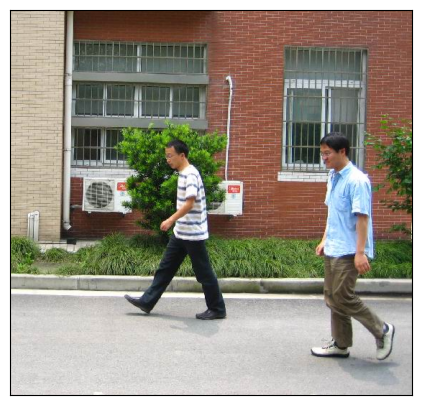

In [29]:
show(img)

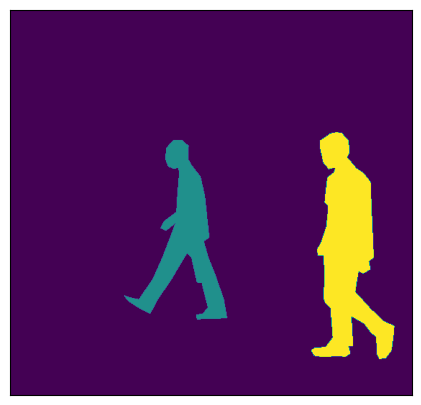

In [30]:
show(mask)

In [31]:
from torchvision.utils import draw_segmentation_masks

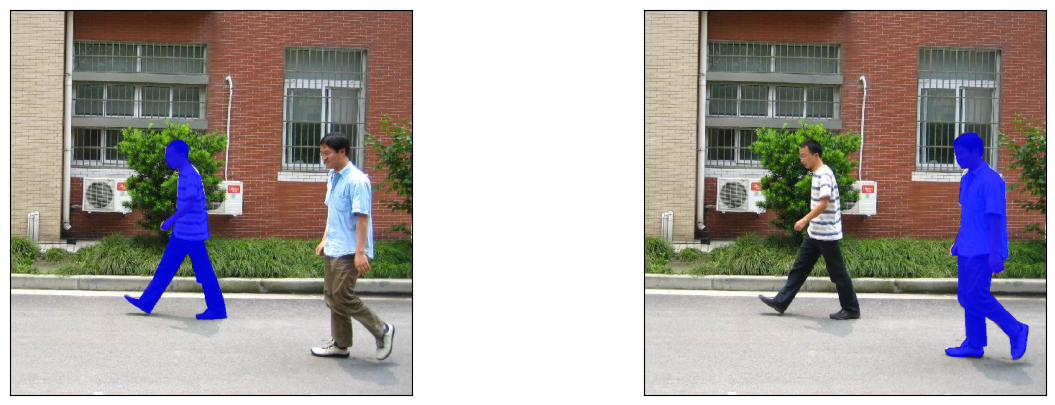

In [32]:
draw_masks = []
for mask in masks:
    draw_masks.append(draw_segmentation_masks(img,mask,alpha=0.8,colors="blue"))
show(draw_masks)

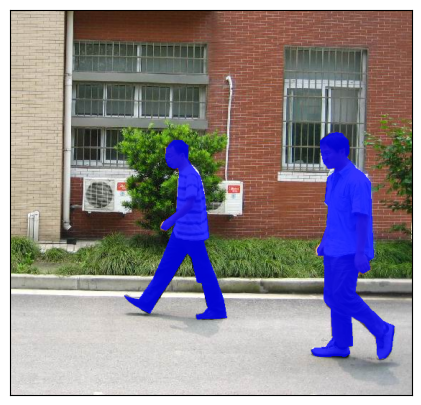

In [33]:
show(draw_segmentation_masks(img,masks,alpha=0.8,colors=["blue","blue"]))

#### Convert the boolean masks into bounding boxes

In [34]:
from torchvision.ops import masks_to_boxes

In [35]:
boxes = masks_to_boxes(masks)

In [36]:
print(boxes)

tensor([[159., 181., 301., 430.],
        [419., 170., 534., 485.]])


In [37]:
boxes.shape

torch.Size([2, 4])

In [38]:
boxes.dtype

torch.float32

#### Draw bounding boxes

In [39]:
from torchvision.utils import draw_bounding_boxes

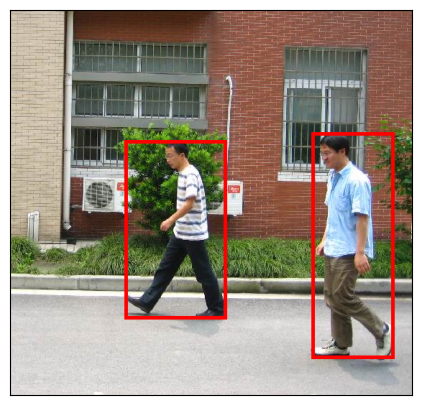

In [40]:
draw_boxes = draw_bounding_boxes(img,boxes,colors = "red",width=5)
show(draw_boxes)

#### Demo with a Faster R-CNN model

In [41]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn,FasterRCNN_ResNet50_FPN_Weights

In [42]:
weights = FasterRCNN_ResNet50_FPN_Weights.COCO_V1

In [43]:
model = fasterrcnn_resnet50_fpn(weights=weights,progres=False)

In [44]:
transforms = weights.transforms()

In [45]:
transforms

ObjectDetection()

In [46]:
img = transforms(img)

In [47]:
img

tensor([[[0.8275, 0.8235, 0.8314,  ..., 0.5608, 0.5725, 0.5804],
         [0.7020, 0.6784, 0.6667,  ..., 0.4941, 0.5020, 0.5020],
         [0.8000, 0.7608, 0.7373,  ..., 0.5098, 0.5137, 0.5098],
         ...,
         [0.8863, 0.8510, 0.8275,  ..., 0.7176, 0.7216, 0.7255],
         [0.9059, 0.8588, 0.8235,  ..., 0.7333, 0.7333, 0.7294],
         [0.8824, 0.8902, 0.8431,  ..., 0.7451, 0.7451, 0.7333]],

        [[0.7843, 0.7804, 0.7882,  ..., 0.3765, 0.3882, 0.3961],
         [0.6588, 0.6353, 0.6235,  ..., 0.3098, 0.3176, 0.3176],
         [0.7569, 0.7176, 0.6941,  ..., 0.3255, 0.3294, 0.3255],
         ...,
         [0.8627, 0.8275, 0.8039,  ..., 0.7176, 0.7216, 0.7255],
         [0.8824, 0.8353, 0.8000,  ..., 0.7333, 0.7333, 0.7294],
         [0.8588, 0.8667, 0.8196,  ..., 0.7451, 0.7451, 0.7333]],

        [[0.7137, 0.7098, 0.7176,  ..., 0.3059, 0.3176, 0.3255],
         [0.5882, 0.5647, 0.5529,  ..., 0.2392, 0.2471, 0.2471],
         [0.6863, 0.6471, 0.6235,  ..., 0.2549, 0.2588, 0.

In [48]:
img.shape

torch.Size([3, 536, 559])

In [49]:
target = {}
target["boxes"] = boxes

In [50]:
masks.size(0)

2

In [51]:
torch.ones((masks.size(0),),dtype = torch.int64)

tensor([1, 1])

In [52]:
labels = torch.ones((masks.size(0),),dtype = torch.int64)

In [53]:
target["labels"] = labels = labels = torch.ones((masks.size(0),),dtype = torch.int64)

In [54]:
labels

tensor([1, 1])

In [55]:
target

{'boxes': tensor([[159., 181., 301., 430.],
         [419., 170., 534., 485.]]),
 'labels': tensor([1, 1])}

In [56]:
img.unsqueeze(0).shape

torch.Size([1, 3, 536, 559])

In [57]:
detection_outputs = model(img.unsqueeze(0),[target])

In [58]:
detection_outputs

{'loss_classifier': tensor(0.0254, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0197, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.0010, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0008, grad_fn=<DivBackward0>)}

### Converting Segmentation Dataset to Detection Dataset

In [59]:
from torch.utils.data import Dataset

In [60]:
import os

In [61]:
class SegmentationToDetectionDataset(Dataset):
    def __init__(self,root,transforms):
        # super().__init__()
        self.root = root
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(os.path.join(root,"PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(root,"PedMasks"))))

    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.root,"PNGImages",self.imgs[idx])
        mask_path = os.path.join(self.root,"PedMasks",self.masks[idx])

        img = read_image(img_path)
        mask = read_image(mask_path)

        objs_ids = torch.unique(mask)
        objs_ids = objs_ids[1:]

        masks = mask == objs_ids[:,None,None]
        boxes = masks_to_boxes(masks)
        labels = torch.ones(masks.size(0),dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks

        if self.transforms is not None:
            img,target = transforms(img,target)
        
        return img,target
        

In [62]:
root = 'E:/jupyterlab/PyTorch Tutorial/TorchVision Object Detection Finetuning Tutorial/PennFudanPed/PennFudanPed'

In [63]:
PennFudanDataset = SegmentationToDetectionDataset(root,transforms=None)

In [64]:
len(PennFudanDataset)

170

In [65]:
img,target = PennFudanDataset.__getitem__(0)

In [66]:
img

tensor([[[211, 210, 212,  ..., 143, 146, 148],
         [179, 173, 170,  ..., 126, 128, 128],
         [204, 194, 188,  ..., 130, 131, 130],
         ...,
         [226, 217, 211,  ..., 183, 184, 185],
         [231, 219, 210,  ..., 187, 187, 186],
         [225, 227, 215,  ..., 190, 190, 187]],

        [[200, 199, 201,  ...,  96,  99, 101],
         [168, 162, 159,  ...,  79,  81,  81],
         [193, 183, 177,  ...,  83,  84,  83],
         ...,
         [220, 211, 205,  ..., 183, 184, 185],
         [225, 213, 204,  ..., 187, 187, 186],
         [219, 221, 209,  ..., 190, 190, 187]],

        [[182, 181, 183,  ...,  78,  81,  83],
         [150, 144, 141,  ...,  61,  63,  63],
         [175, 165, 159,  ...,  65,  66,  65],
         ...,
         [220, 211, 205,  ..., 183, 184, 185],
         [225, 213, 204,  ..., 187, 187, 186],
         [219, 221, 209,  ..., 190, 190, 187]]], dtype=torch.uint8)

In [89]:
target

{'boxes': tensor([[159., 181., 301., 430.],
         [419., 170., 534., 485.]]),
 'labels': tensor([1, 1]),
 'masks': tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]])}

In [66]:
from torch.utils.data import DataLoader

In [67]:
PennFudanDataset = SegmentationToDetectionDataset(root,transforms=None)

In [68]:
batch_size = 4

In [69]:
PennFuda_dataloader = DataLoader(PennFudanDataset,batch_size=batch_size,shuffle=False)

In [70]:
from torchvision.utils import make_grid

In [71]:
def show(imgs):
    if not isinstance(imgs,list):
        imgs = [imgs]
    fix,axs = plt.subplots(ncols=len(imgs),squeeze=False,figsize=(15, 5))
    for i ,img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0,i].imshow(np.asarray(img))
        axs[0,i].set(xticklabels = [],yticklabels = [],xticks = [],yticks = [])

In [155]:
batch_imgs = []
batch_draw_boxes = []
batch_draw_masks = []
batch_combinations = []
for i in range(batch_size):
    img,target = PennFudanDataset.__getitem__(i)
    batch_imgs.append(img)
    draw_bboxes = draw_bounding_boxes(img,target["boxes"],width=5,colors="Red")
    draw_seg_masks = draw_segmentation_masks(img,target["masks"],alpha=0.7)
    batch_draw_boxes.append(draw_bboxes)
    batch_draw_masks.append(draw_seg_masks)
    draw_combination = draw_segmentation_masks(draw_bboxes,target["masks"],alpha=0.7)
    batch_combinations.append(draw_combination)

In [147]:
print(batch_draw_boxes[0].shape)
print(batch_draw_masks[0].shape)

torch.Size([3, 536, 559])
torch.Size([3, 536, 559])


In [136]:
batch_imgs

[tensor([[[211, 210, 212,  ..., 143, 146, 148],
          [179, 173, 170,  ..., 126, 128, 128],
          [204, 194, 188,  ..., 130, 131, 130],
          ...,
          [226, 217, 211,  ..., 183, 184, 185],
          [231, 219, 210,  ..., 187, 187, 186],
          [225, 227, 215,  ..., 190, 190, 187]],
 
         [[200, 199, 201,  ...,  96,  99, 101],
          [168, 162, 159,  ...,  79,  81,  81],
          [193, 183, 177,  ...,  83,  84,  83],
          ...,
          [220, 211, 205,  ..., 183, 184, 185],
          [225, 213, 204,  ..., 187, 187, 186],
          [219, 221, 209,  ..., 190, 190, 187]],
 
         [[182, 181, 183,  ...,  78,  81,  83],
          [150, 144, 141,  ...,  61,  63,  63],
          [175, 165, 159,  ...,  65,  66,  65],
          ...,
          [220, 211, 205,  ..., 183, 184, 185],
          [225, 213, 204,  ..., 187, 187, 186],
          [219, 221, 209,  ..., 190, 190, 187]]], dtype=torch.uint8),
 tensor([[[ 87,  99,  86,  ..., 248, 249, 249],
          [ 61,

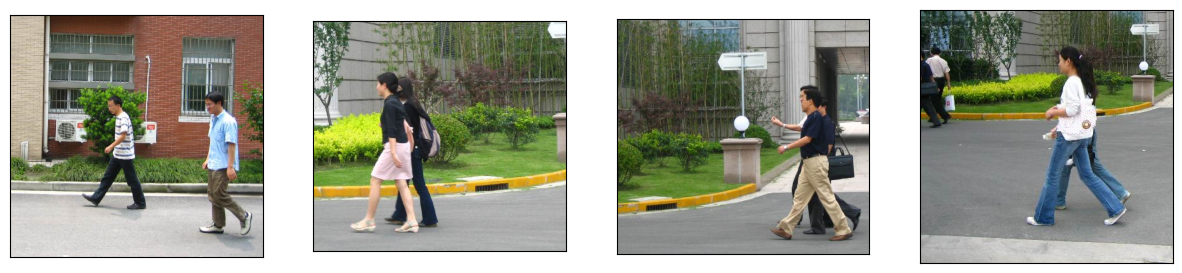

In [137]:
show(batch_imgs)

In [138]:
batch_draw_boxes

[tensor([[[211, 210, 212,  ..., 143, 146, 148],
          [179, 173, 170,  ..., 126, 128, 128],
          [204, 194, 188,  ..., 130, 131, 130],
          ...,
          [226, 217, 211,  ..., 183, 184, 185],
          [231, 219, 210,  ..., 187, 187, 186],
          [225, 227, 215,  ..., 190, 190, 187]],
 
         [[200, 199, 201,  ...,  96,  99, 101],
          [168, 162, 159,  ...,  79,  81,  81],
          [193, 183, 177,  ...,  83,  84,  83],
          ...,
          [220, 211, 205,  ..., 183, 184, 185],
          [225, 213, 204,  ..., 187, 187, 186],
          [219, 221, 209,  ..., 190, 190, 187]],
 
         [[182, 181, 183,  ...,  78,  81,  83],
          [150, 144, 141,  ...,  61,  63,  63],
          [175, 165, 159,  ...,  65,  66,  65],
          ...,
          [220, 211, 205,  ..., 183, 184, 185],
          [225, 213, 204,  ..., 187, 187, 186],
          [219, 221, 209,  ..., 190, 190, 187]]], dtype=torch.uint8),
 tensor([[[ 87,  99,  86,  ..., 248, 249, 249],
          [ 61,

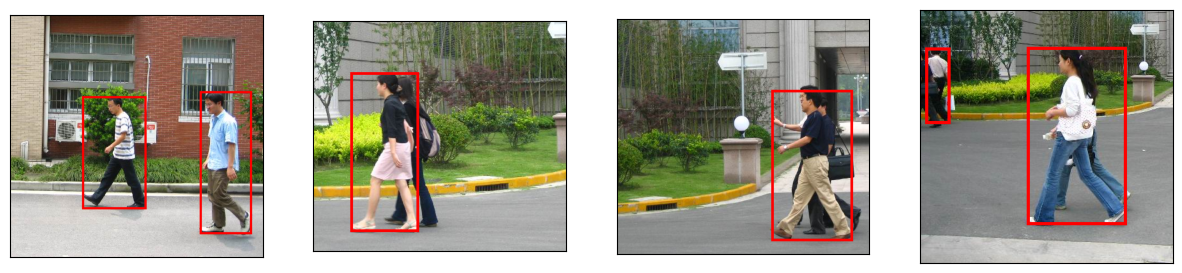

In [157]:
show(batch_draw_boxes)

In [140]:
batch_draw_masks

[tensor([[[211, 210, 212,  ..., 143, 146, 148],
          [179, 173, 170,  ..., 126, 128, 128],
          [204, 194, 188,  ..., 130, 131, 130],
          ...,
          [226, 217, 211,  ..., 183, 184, 185],
          [231, 219, 210,  ..., 187, 187, 186],
          [225, 227, 215,  ..., 190, 190, 187]],
 
         [[200, 199, 201,  ...,  96,  99, 101],
          [168, 162, 159,  ...,  79,  81,  81],
          [193, 183, 177,  ...,  83,  84,  83],
          ...,
          [220, 211, 205,  ..., 183, 184, 185],
          [225, 213, 204,  ..., 187, 187, 186],
          [219, 221, 209,  ..., 190, 190, 187]],
 
         [[182, 181, 183,  ...,  78,  81,  83],
          [150, 144, 141,  ...,  61,  63,  63],
          [175, 165, 159,  ...,  65,  66,  65],
          ...,
          [220, 211, 205,  ..., 183, 184, 185],
          [225, 213, 204,  ..., 187, 187, 186],
          [219, 221, 209,  ..., 190, 190, 187]]], dtype=torch.uint8),
 tensor([[[ 87,  99,  86,  ..., 248, 249, 249],
          [ 61,

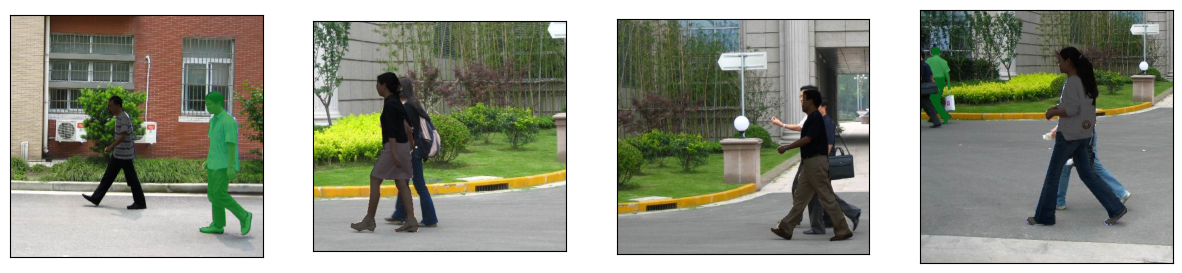

In [158]:
show(batch_draw_masks)

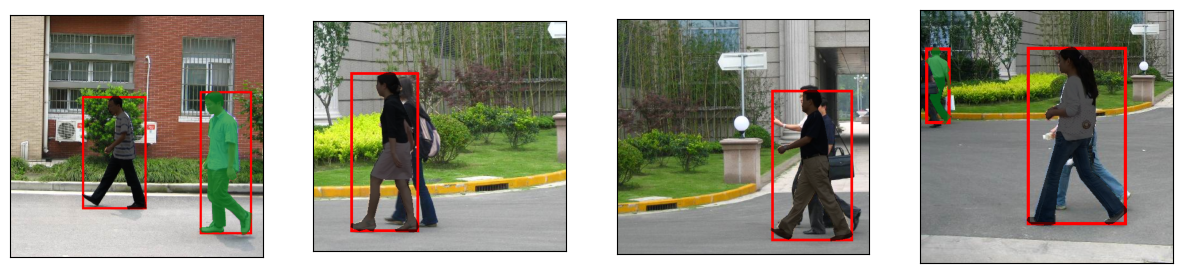

In [156]:
show(batch_combinations)